import the dependencies

In [7]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

data collection

In [9]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [11]:
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

converting the raw data into dataframe

In [12]:
house_price_dataframe = pd.DataFrame(data = house_price_dataset.data, columns = house_price_dataset.feature_names)

In [13]:
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

adding the target column

In [14]:
house_price_dataframe["price"] = house_price_dataset.target

In [15]:
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

EDA

checking for the shape

In [16]:
house_price_dataframe.shape

(20640, 9)

In [18]:
house_price_dataframe.isnull().sum() # no missing values observed

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [19]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
house_price_dataframe.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

understanding the correlation between various features in a dataframe

In [21]:
correlation = house_price_dataframe.corr()

<Axes: >

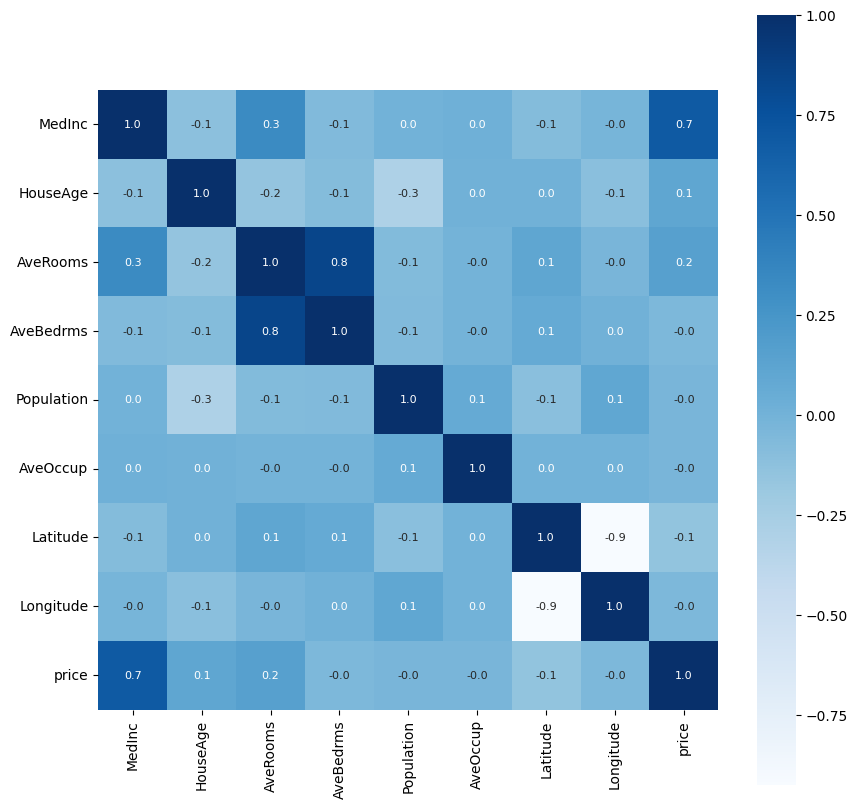

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, fmt = ".1f", annot=True, square = True, cmap = "Blues", annot_kws = {"size":8})

In [44]:
correlation_pop = house_price_dataframe[["Population", "AveOccup"]]. corr()

<Axes: >

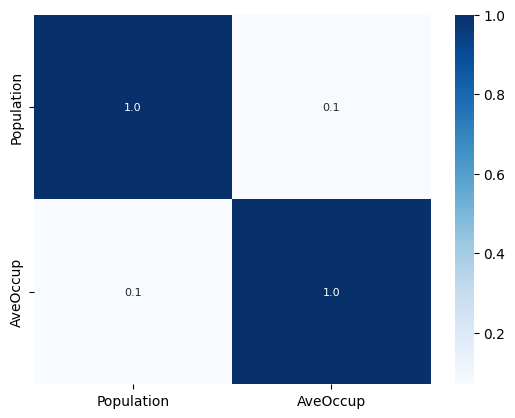

In [45]:
sns.heatmap(correlation_pop, fmt = ".1f", annot = True, cmap = "Blues", cbar = True, annot_kws = {"size": 8})

In [41]:
house_price_dataframe.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [56]:
X = house_price_dataframe[["MedInc","Population","AveRooms"]]
y = house_price_dataframe["price"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 3) (16512, 3) (4128, 3)


In [59]:
print(y.shape, y_train.shape, y_test.shape)

(20640,) (16512,) (4128,)


model creation using XGBRegressor

In [60]:
model = XGBRegressor()

In [61]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation metric

prediction for training data

In [62]:
prediction_train = model.predict(X_train)

score_train_r2 = metrics.r2_score(y_train, prediction_train)
score_train_mae = metrics.mean_absolute_error(y_train, prediction_train)

print("r2 error for training data: ", score_train_r2)
print("Mean absolute error for training data: ", score_train_mae)

r2 error for training data:  0.7334515230252057
Mean absolute error for training data:  0.4387831022939802


we predicted for training data for determining whether the model performing overfitting or not

visualization of the correlation betweeen y_train and prediction_train

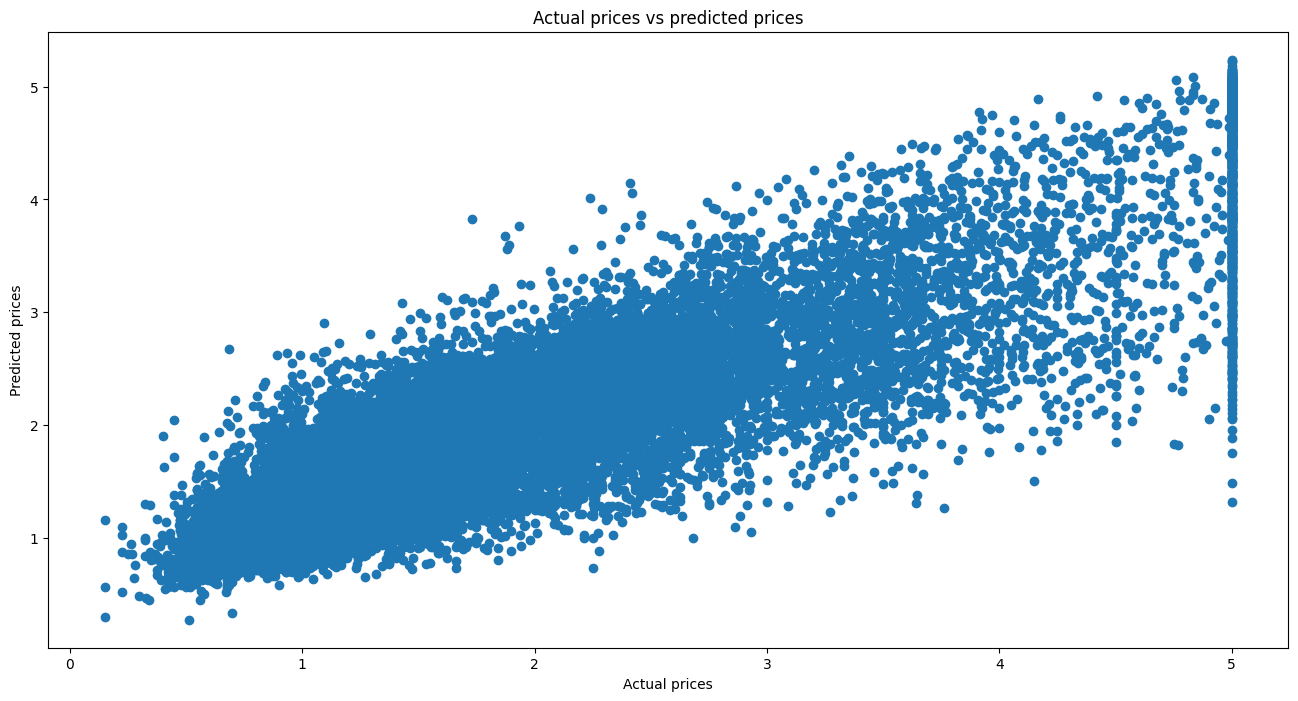

In [63]:
plt.figure(figsize = (16, 8))
plt.scatter(y_train, prediction_train)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs predicted prices")
plt.show()

they are positively correlated, thus the model performs quite well upon the training data

prediction for testing data

In [64]:
prediction_test = model.predict(X_test)

score_test_r2 = metrics.r2_score(y_test, prediction_test)
score_test_mae = metrics.mean_absolute_error(y_test, prediction_test)

print("r2 error for testing data: ", score_test_r2)
print("Mean absolute error for testing data: ", score_test_mae)

r2 error for testing data:  0.5131744639623004
Mean absolute error for testing data:  0.5865103261351591


visualization of the correlation between y_train and prediction_test

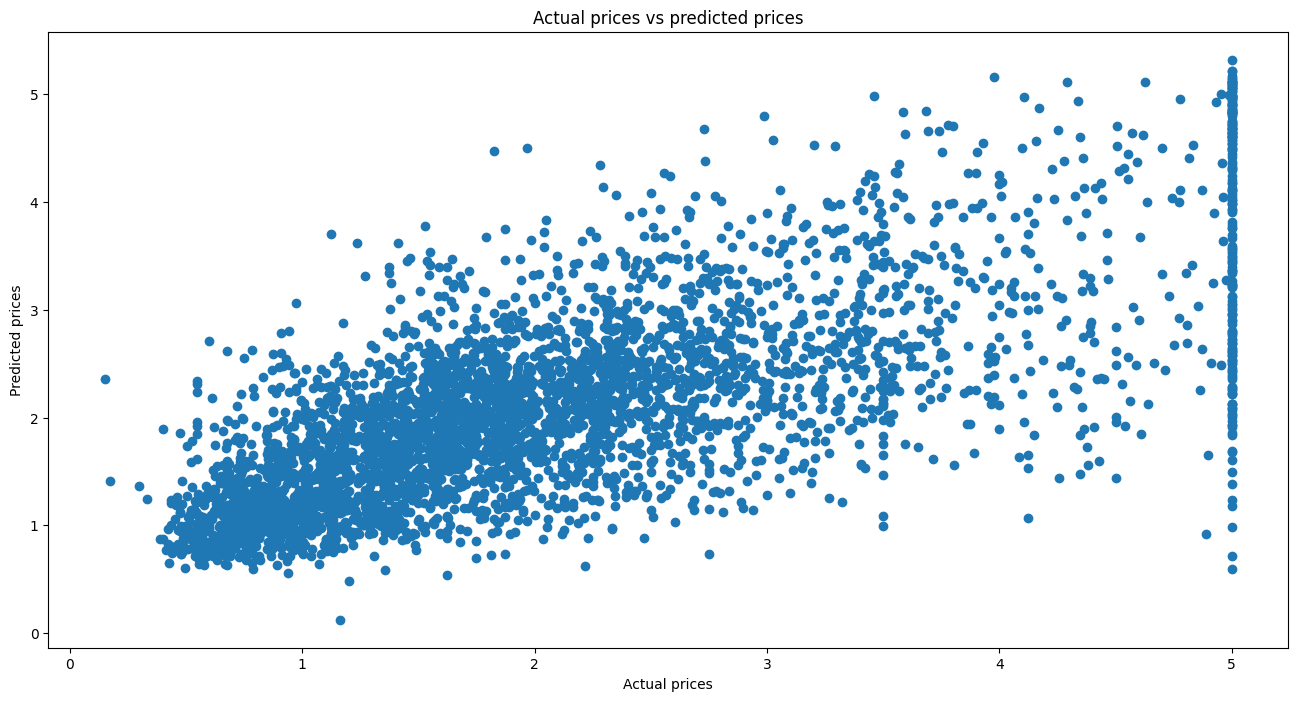

In [65]:
plt.figure(figsize = (16, 8))
plt.scatter(y_test, prediction_test)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs predicted prices")
plt.show()

the model performs average upon the testing data